In [ ]:
# Charger le fichier et vérifier les colonnes.

In [1]:
import pandas as pd
import gensim
import numpy
import scipy

In [2]:
df = pd.read_csv("clean_reviews_with_labels.csv")
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,cons,status,experience,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,You have to be careful because this job can ta...,current,No information,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,I suppose that a con would be that there is a ...,current,No information,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,The people at Apple are living on the bleeding...,current,No information,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,"As part of their intensive training, there are...",current,No information,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,Too much confidentiality. You couldn't even f...,former,No information,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0


In [ ]:
# Création des nouvelles colonnes tokenisées

In [3]:
def simple_tokenize(text):
    if pd.isnull(text):
        return []
    return text.lower().split()

df['proceeded_pros_clean'] = df['pros_clean'].apply(simple_tokenize)
df['proceeded_cons_clean'] = df['cons_clean'].apply(simple_tokenize)
df['proceeded_headline'] = df['headline_clean'].apply(simple_tokenize)

In [4]:
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label,proceeded_pros_clean,proceeded_cons_clean,proceeded_headline
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1,"[people, work, great, not, imagine, life, will...","[careful, job, life, careful, need, learn, sep...","[product, poeple, enjoy, buy]"
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1,"[big, positive, enjoy, job, apple, innovative,...","[suppose, con, hard, balance, work, home, life]","[different, job, different, creative, product,..."
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1,"[work, place, like, apple, opportunity, change...","[people, apple, live, bleed, edge, not, know, ...","[work, apple, hard, job, love]"
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1,"[despite, fact, boil, sell, product, apple, ma...","[intensive, training, mandatory, meeting, mont...","[retail, job, altogether, exciting, thrilling,..."
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0,"[benefit, fulltime, employee, great, stock, op...","[confidentiality, not, fart, get, reprimand, w...","[bad, choice]"


In [6]:
# S’assurer que les colonnes sont bien des listes de mots

In [5]:
print(df[['proceeded_pros_clean', 'proceeded_cons_clean', 'proceeded_headline']].head())

                                proceeded_pros_clean  \
0  [people, work, great, not, imagine, life, will...   
1  [big, positive, enjoy, job, apple, innovative,...   
2  [work, place, like, apple, opportunity, change...   
3  [despite, fact, boil, sell, product, apple, ma...   
4  [benefit, fulltime, employee, great, stock, op...   

                                proceeded_cons_clean  \
0  [careful, job, life, careful, need, learn, sep...   
1    [suppose, con, hard, balance, work, home, life]   
2  [people, apple, live, bleed, edge, not, know, ...   
3  [intensive, training, mandatory, meeting, mont...   
4  [confidentiality, not, fart, get, reprimand, w...   

                                  proceeded_headline  
0                      [product, poeple, enjoy, buy]  
1  [different, job, different, creative, product,...  
2                     [work, apple, hard, job, love]  
3  [retail, job, altogether, exciting, thrilling,...  
4                                      [bad, choice

In [ ]:
# Fusionner toutes les phrases dans une seule liste

In [6]:
sentences = []

for col in ['proceeded_pros_clean', 'proceeded_cons_clean', 'proceeded_headline']:
    sentences.extend(df[col].tolist())

In [ ]:
# Entraîner le modèle Word2Vec
# Critères pour choisir la taille des vecteurs
    # Corpus petit ou spécialisé : 
        # Privilégie des dimensions plus faibles (par exemple, 50 à 100). 
        # Cela limite le risque de surapprentissage et réduit le temps de calcul.

In [7]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # taille des vecteurs, à ajuster selon tes besoins
    window=5,          # fenêtre de contexte
    min_count=1,       # inclure tous les mots
    workers=4,         # nombre de threads
    sg=0               # 0 = CBOW, 1 = Skip-gram
)

In [8]:
vector = model.wv['salary']
print(vector)

[ 2.0834875  -2.009517   -0.0164306  -0.22799137 -0.9359122   0.48939213
 -0.6828344   0.9266265  -0.2745881   0.64410603  0.1656931   0.8371952
  0.69293296 -2.4941666   0.4260775   1.968444   -0.735711   -0.4881132
  0.34644392 -0.848211   -2.6424937  -0.69133794  0.9895083  -1.5485978
 -3.735117    0.36945575  0.66252047  0.11041988 -0.58592045  0.9940732
 -1.5810442  -1.011151   -0.42113355  0.17463273  0.77163595 -0.8720029
 -1.1420888  -1.4627862  -0.4199779  -2.3366983   1.0635793  -1.6043445
 -0.492184    1.678845   -1.9620935  -1.3390925  -2.8665268   0.20097835
 -0.42062065 -2.0074844  -0.64734906  1.7431316  -1.5491376  -0.11992054
  0.922135    0.38692474  0.8530261  -0.27441406  1.1361922  -1.5183923
 -1.4214258   2.0947058  -2.3360553   1.4666846   0.34393236  1.0862093
 -0.7221515   0.3976273  -1.7875258   0.3507709   0.32539144  0.46605325
  1.5160596   0.70495296  0.09995247  0.89836484 -0.29720953 -1.182878
 -0.33283094  3.4417343   0.77048695  0.39067525 -0.04553471 

In [9]:
print(model.wv.most_similar('salary'))

[('compensation', 0.8348376154899597), ('pay', 0.8310405015945435), ('payment', 0.6750485897064209), ('remuneration', 0.6581483483314514), ('wage', 0.6475513577461243), ('comp', 0.6260722875595093), ('package', 0.5928002595901489), ('payout', 0.5753496289253235), ('bonus', 0.5668436884880066), ('income', 0.5525239109992981)]


In [10]:
vector = model.wv['promotion']
print(vector)

[-0.19325627  2.6996057  -0.20894083  3.7767377  -1.4682105  -1.1470233
 -1.4637525  -0.7437556   0.341706    1.167916   -0.9150129   0.65306896
  1.2159358  -0.13968538  0.8250998   0.42996988 -0.48265284 -1.513634
  2.173118    0.228074   -3.0015156   0.7558918  -0.0386063   0.560389
 -2.0568302   0.2857523  -2.7034538   1.6569092   0.60914713 -1.3788543
 -1.3550042  -0.9799124  -1.2281048  -1.3241148   1.1403624   0.510361
 -1.5055927  -0.15170877 -1.4397632  -2.355169    0.34517005 -0.557851
  0.20203526  1.7185653   1.3972666  -1.6339773  -1.6903753  -0.30389765
 -1.0983186  -0.48886162 -1.3086516  -0.154843   -0.4976511   1.1225175
 -0.88460314 -1.182016   -3.115751    2.9040701  -0.86705214 -3.3614388
 -1.2718954   0.75099736 -1.9512137  -0.5417946  -0.5043994  -1.322335
  1.1886725  -0.4614563  -3.7524967   0.41513777  0.95142066  0.13368788
  3.3763258  -0.26872295 -0.1859164   2.1444743   0.7053215  -0.44743428
  0.2672822   2.1983418   1.2773329  -0.5455593   0.27634335  1.0

In [11]:
print(model.wv.most_similar('promotion'))

[('promote', 0.6632954478263855), ('promotional', 0.6254876255989075), ('merit', 0.6100969910621643), ('progression', 0.608964741230011), ('seniority', 0.5765953063964844), ('appraisal', 0.5633692741394043), ('advancement', 0.5600230097770691), ('promo', 0.5584565997123718), ('rating', 0.5250895023345947), ('evaluation', 0.522152841091156)]


In [12]:
vector = model.wv['openspace']
print(vector)

[-0.03148383 -0.02133962  0.01207878  0.00342608  0.00589398 -0.03359687
  0.07755516  0.09871269  0.03707224 -0.08305494 -0.04143414 -0.0560307
  0.01371357  0.0097078   0.04154192 -0.00655851 -0.02477738 -0.05832066
 -0.00836676 -0.02236391  0.02822785 -0.03883474 -0.01227055 -0.04249406
  0.02853882 -0.02844119 -0.02752204 -0.00203975  0.05025643  0.0044772
  0.11451048  0.02405027 -0.08775217  0.03449932 -0.05274875  0.01327271
  0.00945647 -0.08983114 -0.08271506 -0.0456634  -0.03681661 -0.01314172
  0.00674665  0.00881279  0.03242005 -0.00390932 -0.07068747 -0.03676232
  0.03421796  0.0620556   0.01749285 -0.01510795  0.10833162 -0.0737882
 -0.03876132  0.09662346  0.05305796  0.01735744 -0.03167499  0.03309394
  0.02965962  0.0053313   0.00442415 -0.06143758 -0.02248933  0.05925637
 -0.07597336 -0.02434028  0.03688112 -0.00306534 -0.00663972  0.01872956
  0.00251881 -0.02178977 -0.01377752 -0.02257866  0.00112139  0.06765881
 -0.03386593  0.02644943 -0.03400572  0.08528544 -0.02

In [13]:
print(model.wv.most_similar('openspace'))

[('nightlife', 0.7662171125411987), ('lication', 0.7648306488990784), ('dtrict', 0.7626355886459351), ('quay', 0.758124053478241), ('opportunitieswork', 0.7493519186973572), ('experuance', 0.7461932301521301), ('frendly', 0.7446178793907166), ('opportunitiesgood', 0.743664026260376), ('gromme', 0.7420817017555237), ('timingsyou', 0.7419970631599426)]


In [14]:
vector = model.wv['life']
print(vector)

[ 9.83735859e-01  1.07351863e+00  8.15958619e-01 -1.25372553e+00
  2.38573027e+00  4.14253265e-01  2.99934477e-01  7.09657669e-01
  2.84612560e+00  2.15157461e+00 -3.75400990e-01 -1.66866553e+00
 -4.93215859e-01 -5.56373239e-01 -4.24625278e-01  1.97301447e+00
 -6.65359259e-01 -2.35210943e+00  1.52729344e+00  7.35700488e-01
  1.49545670e+00 -4.60876912e-01  1.21593463e+00 -1.87360123e-01
 -2.57412410e+00  3.20082784e-01 -7.11637020e-01  9.01933968e-01
  4.19979811e-01 -1.68532085e+00  7.30491698e-01  7.07561255e-01
 -1.61763918e+00 -9.10006642e-01 -1.60353923e+00 -3.60920167e+00
  1.46351051e+00  2.33918762e+00  2.50186634e+00  2.77285218e-01
  7.00741336e-02  1.61420345e+00 -5.51524639e-01  9.95241404e-01
 -6.18880510e-01  1.64284623e+00 -1.91681638e-01  3.05783033e+00
 -1.47596776e+00 -1.00883514e-01  1.27877712e+00  2.89453578e+00
 -7.95849502e-01 -1.27578640e+00 -4.94966954e-01  2.73240662e+00
 -9.86551225e-01  2.70685577e+00 -2.34160110e-01  1.39827371e+00
 -8.90390798e-02 -4.74810

In [15]:
print(model.wv.most_similar('life'))

[('worklife', 0.7970786094665527), ('lifework', 0.6274511218070984), ('workfamily', 0.5585635304450989), ('flexibilityworklife', 0.5241379737854004), ('shiftsie', 0.4845268130302429), ('workinglife', 0.4827047884464264), ('lotwoklife', 0.48019781708717346), ('wl', 0.47754690051078796), ('employeeshuman', 0.47573572397232056), ('lifeneede', 0.47353509068489075)]


In [16]:
vector = model.wv['quit']
print(vector)

[ 1.53622925e+00 -7.48211324e-01 -1.43501735e+00  1.78273499e-01
 -1.77178335e+00  8.25376689e-01  2.24194944e-01 -1.54092777e+00
 -1.02105878e-01  2.02661014e+00 -3.42828870e-01  3.14769745e+00
  1.34725228e-01 -8.45990002e-01  9.49871540e-02 -1.84194520e-01
  8.66704941e-01  1.03284323e+00  9.28457305e-02  1.06457248e-01
  9.81014252e-01 -6.63675785e-01  2.90120453e-01 -6.60266340e-01
  1.10072404e-01 -8.39177132e-01 -1.67722348e-02  1.71567249e+00
  5.84049344e-01  4.42892671e-01  5.95859766e-01 -7.15560913e-01
 -2.82590717e-01 -7.69335747e-01  5.25126159e-01 -4.94885892e-02
 -1.12909354e-01 -1.79388404e-01  1.53907108e+00 -1.10433924e+00
  9.62376967e-02  1.54729548e-03 -1.92640558e-01  1.26412168e-01
  1.55931199e+00  4.44377542e-01  5.02848208e-01  5.99538200e-02
  5.68677008e-01  1.67000520e+00 -4.20721442e-01  1.54409635e+00
 -9.32242155e-01 -1.07149839e+00  7.47304857e-01  4.81982529e-02
 -6.33993208e-01 -2.54094750e-01 -1.77302444e+00 -7.50019312e-01
 -6.16753280e-01  1.17025

In [17]:
print(model.wv.most_similar('quit'))

[('fire', 0.7913002967834473), ('resign', 0.7805958986282349), ('retire', 0.7256820797920227), ('leave', 0.7160985469818115), ('let', 0.7159082889556885), ('soon', 0.697101354598999), ('lay', 0.6644676923751831), ('realize', 0.6597463488578796), ('later', 0.6579676866531372), ('eventually', 0.6564615964889526)]


In [18]:
model.save("word2vec_pros.model")

In [ ]:
# Suppression de la valeur 3 comme score qui est neutre et non pertinent pour notre analyse

In [19]:
df = df[df['overall_rating'] != 3].copy()

In [ ]:
# Combinaison des textes

In [20]:
df['text'] = df['headline_clean'].fillna('') + ' ' + df['pros_clean'].fillna('') + ' ' + df['cons_clean'].fillna('')

In [ ]:
# Classification par score (resultat binaire positif/négatif)

In [21]:
df['sentiment'] = df['overall_rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

In [ ]:
# Créer encoded labels

In [22]:
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label,proceeded_pros_clean,proceeded_cons_clean,proceeded_headline
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1,"[people, work, great, not, imagine, life, will...","[careful, job, life, careful, need, learn, sep...","[product, poeple, enjoy, buy]"
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1,"[big, positive, enjoy, job, apple, innovative,...","[suppose, con, hard, balance, work, home, life]","[different, job, different, creative, product,..."
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1,"[work, place, like, apple, opportunity, change...","[people, apple, live, bleed, edge, not, know, ...","[work, apple, hard, job, love]"
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1,"[despite, fact, boil, sell, product, apple, ma...","[intensive, training, mandatory, meeting, mont...","[retail, job, altogether, exciting, thrilling,..."
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0,"[benefit, fulltime, employee, great, stock, op...","[confidentiality, not, fart, get, reprimand, w...","[bad, choice]"


In [ ]:
# Charger le modèle Word2Vec

In [23]:
model = Word2Vec.load("word2vec_pros.model")

In [ ]:
# Transformer chaque colonne en vecteur

In [24]:
import numpy as np
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['vec_pros'] = df['proceeded_pros_clean'].apply(lambda x: get_sentence_vector(x, model))
df['vec_cons'] = df['proceeded_cons_clean'].apply(lambda x: get_sentence_vector(x, model))
df['vec_headline'] = df['proceeded_headline'].apply(lambda x: get_sentence_vector(x, model))

In [ ]:
# Concaténer les vecteurs des trois colonnes

In [25]:
df['vector'] = df.apply(
    lambda row: np.concatenate([row['vec_pros'], row['vec_cons'], row['vec_headline']]),
    axis=1
)

In [ ]:
# Préparer les données pour la régression logistique = créer X (features) et y (cible)

In [26]:
X = np.vstack(df['vector'].values)
y = df['sentiment'].values

In [ ]:
# Diviser en train/test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Utilisation de SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

C:\Users\l.becheras\AppData\Local\anaconda3\envs\WORDEMBEDDING_WORD2VEC_SMOTE\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
# Standardiser les données

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# entrainer la regression logistique

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Évaluer le modèle

In [32]:
df['sentiment'].value_counts(normalize=True)

positive    0.810786
negative    0.189214
Name: sentiment, dtype: float64

In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8780409245926487
Classification report:
               precision    recall  f1-score   support

    negative       0.75      0.53      0.62      9947
    positive       0.90      0.96      0.93     42833

    accuracy                           0.88     52780
   macro avg       0.82      0.74      0.77     52780
weighted avg       0.87      0.88      0.87     52780



In [ ]:
# Classe 0 (NEGATIVE) :
    # Précision 0.75 : 75% des éléments prédits comme "0" sont effectivement des "0".
    # Rappel 0.53 : Le modèle retrouve 53% des vrais "0". - CONTREE 52 AVANT SMOTE
    # F1-score 0.62 : Moyenne harmonique entre précision et rappel. - CONTRE 61 AVANT SMOTE
    # Support 9947 : Nombre de vrais exemples de la classe 0.

# Classe 1 (POSITIVE) :
    # Précision 0.90 : 90% des éléments prédits comme "1" sont effectivement des "1".
    # Rappel 0.96 : Le modèle retrouve 96% des vrais "1".
    # F1-score 0.93 : Excellente performance sur cette classe.
    # Support 42833 : Nombre de vrais exemples de la classe 1.

In [ ]:
# Interprétation
    # Le modèle est très performant sur la classe majoritaire (1), mais a plus de mal à détecter la classe minoritaire (0).
    # Le rappel de la classe 0 est faible (0.53) : le modèle "rate" presque la moitié des vrais exemples de cette classe.
    # Déséquilibre des classes : la classe 1 est beaucoup plus représentée dans vos données (4 fois plus d'exemples que la classe 0), 
    # ce qui peut expliquer les performances déséquilibrées.

In [ ]:
# Conseils pour amélioration
    # Si la classe 0 est importante (par exemple, détection de fraude, maladie, etc.), il serait pertinent :
    # D'équilibrer les classes avec SMOTE = AVEC SMOTE RESULTAT SIMILAIRE
    # D'utiliser des métriques plus adaptées (AUC-ROC, F1-score de la classe 0, etc.)
# Si la classe 1 est prioritaire, la performance est déjà très bonne.

In [ ]:
# Résumé
    # Bonne accuracy globale (87%)
    # Excellente performance sur la classe majoritaire
    # Performance à améliorer sur la classe minoritaire si elle est importante pour votre cas d'usage

In [34]:
from sklearn.metrics import confusion_matrix

# y_test : vraies étiquettes
# y_pred : étiquettes prédites par votre modèle
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5261  4686]
 [ 1751 41082]]


In [ ]:
# Affichage graphique

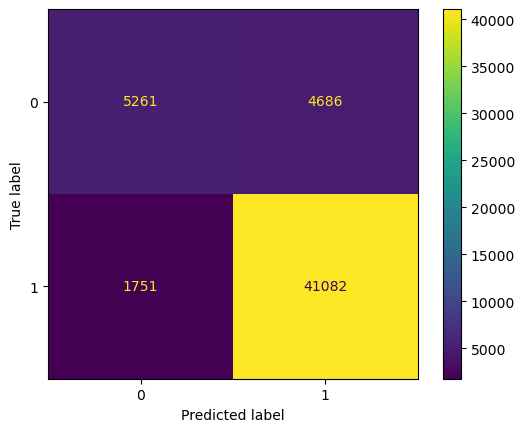

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()